In [ ]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)

##Drive Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path_drive = '/content/drive/My Drive/'
#path = path_drive+'ProgettoDL/'

Mounted at /content/drive


___

In [ ]:
dtypes = {
    'price' : 'int',
    'date' : 'str',       #oppure Type time?
    'time' : 'str',
    'geo_lat' : 'float',
    'geo_lon' : 'float',
    'region' : 'float',
    'building_type' : 'float',
    'level' : 'float',
    'levels' : 'float',
    'rooms' : 'float',
    'area' : 'float',
    'kitchen_area' : 'float',
    'object_type' : 'int' 
} 

# Load the data
d = pd.read_csv(path_drive+'Classificazione_Data_Science/all_v2.csv', sep=',', header=0, dtype=dtypes)
#survived = d['Survived']

'''limitare lunghezza dataset'''
#d = d[:500000]  #sopra rischia di eccedere la memoria


'''ANDIAMO A CONVERTIRE IL PREZZO DA RUBLI A EURO - COEFFICIENTE DI CAMBIO 83.33 (1 RUBLO = 0.012 EURO)'''
d['price']=d['price']/83.33
'''ELIMINO RIGHE CON PREZZI NULLI E NEGATIVI'''
d = d.drop(d.index[d['price'] == 0.0])
d = d.drop(d.index[d['price'] < 0.0])

print(len(d))
d = d[d['area']>10] #rimuovo case sotto i 10M^2
print(len(d))


'''VALUTA SE INSERIRLE PER POSSIBILI NUOVE ANALISI'''
d = d.drop(['date', 'time', 'levels'], axis=1)

'''RIMOZIONE DI ISTANZE CON PREZZI NULLI O NEGATIVI'''
count = (d['price'] < 0).sum().sum()
print (count)

count2 = (d['price'] == 0).sum().sum()
print (count2)


d.head()

5476618
5469037
0
0


,price,geo_lat,geo_lon,region,building_type,level,rooms,area,kitchen_area,object_type
0,72602.904116,59.805808,30.376141,2661.0,1.0,8.0,3.0,82.6,10.8,1
1,103804.152166,55.683807,37.297405,81.0,3.0,5.0,2.0,69.1,12.0,1
2,48001.920077,56.295250,44.061637,2871.0,1.0,5.0,3.0,66.0,10.0,1
3,22200.888036,44.996132,39.074783,2843.0,4.0,12.0,2.0,38.0,5.0,11
4,65402.616105,55.918767,37.984642,81.0,3.0,13.0,2.0,60.0,10.0,1


In [ ]:
'''PULIZIA DELLE STANZE CHE SONO IMPOSTATE A VALORI NEGATIVI DA DATAFRAME BASE, PORTANDOLI A POSITIVI'''
count = (d['rooms'] < 0).sum().sum()
print (count)

d['rooms'] = d['rooms'].replace(-1,1)
d['rooms'] = d['rooms'].replace(-2,2)

count = (d['rooms'] < 0).sum().sum()
print (count)

a = d['rooms'].unique()
print(sorted(a))

'''CONTA DEI VALORI NEGATIVI IN CIASCUNA COLONNA'''
'''
count = (d['price'] < 0).sum().sum()
print (count)
count = (d['geo_lat'] < 0).sum().sum()
print (count)
count = (d['geo_lon'] < 0).sum().sum()
print (count)
count = (d['region'] < 0).sum().sum()
print (count)
count = (d['building_type'] < 0).sum().sum()
print (count)
count = (d['level'] < 0).sum().sum()
print (count)
count = (d['rooms'] < 0).sum().sum()
print (count)
count = (d['area'] < 0).sum().sum()
print (count)
count = (d['kitchen_area'] < 0).sum().sum()
print (count)
count = (d['object_type'] < 0).sum().sum()
print (count)
'''

305685
0
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


"\ncount = (d['price'] < 0).sum().sum()\nprint (count)\ncount = (d['geo_lat'] < 0).sum().sum()\nprint (count)\ncount = (d['geo_lon'] < 0).sum().sum()\nprint (count)\ncount = (d['region'] < 0).sum().sum()\nprint (count)\ncount = (d['building_type'] < 0).sum().sum()\nprint (count)\ncount = (d['level'] < 0).sum().sum()\nprint (count)\ncount = (d['rooms'] < 0).sum().sum()\nprint (count)\ncount = (d['area'] < 0).sum().sum()\nprint (count)\ncount = (d['kitchen_area'] < 0).sum().sum()\nprint (count)\ncount = (d['object_type'] < 0).sum().sum()\nprint (count)\n"

In [ ]:
'''STAMPA A VIDEO DEL NUMERO DI ISTANZE PER RANGE DI PREZZI'''
'''
#print(len(above_1million))
#print(len(d[d["price"] > 750000])-len(d[d["price"] > 1000000]))
print(len(d[d["price"] > 750000]))
print(len(d[d["price"] > 500000])-len(d[d["price"] > 750000]))
print(len(d[d["price"] > 300000])-len(d[d["price"] > 500000]))
print(len(d[d["price"] > 200000])-len(d[d["price"] > 300000]))

print(len(d[d["price"] > 150000])-len(d[d["price"] > 200000]))

print(len(d[d["price"] > 100000])-len(d[d["price"] > 150000]))
print(len(d[d["price"] > 75000])-len(d[d["price"] > 100000]))
print(len(d[d["price"] > 50000])-len(d[d["price"] > 75000]))
print(len(d[d["price"] > 25000])-len(d[d["price"] > 50000]))
print(len(d[d["price"] < 25000]))
'''

'\n#print(len(above_1million))\n#print(len(d[d["price"] > 750000])-len(d[d["price"] > 1000000]))\nprint(len(d[d["price"] > 750000]))\nprint(len(d[d["price"] > 500000])-len(d[d["price"] > 750000]))\nprint(len(d[d["price"] > 300000])-len(d[d["price"] > 500000]))\nprint(len(d[d["price"] > 200000])-len(d[d["price"] > 300000]))\n\nprint(len(d[d["price"] > 150000])-len(d[d["price"] > 200000]))\n\nprint(len(d[d["price"] > 100000])-len(d[d["price"] > 150000]))\nprint(len(d[d["price"] > 75000])-len(d[d["price"] > 100000]))\nprint(len(d[d["price"] > 50000])-len(d[d["price"] > 75000]))\nprint(len(d[d["price"] > 25000])-len(d[d["price"] > 50000]))\nprint(len(d[d["price"] < 25000]))\n'

In [ ]:
'''SELEZIONE DELLE CASE PER LA REGIONE CON PIU ISTANZE TRA TUTTE, LASCIANDO ANCHE CASE CHE HANNO AREE INFERIORI A 10 M^2'''
rnd_state = 1


'''TRAIN'''
major_region = d[d["region"]== 9654]    #REGIONE CON PIU CASE IN VENDITA
print("regione con piu case in vendita")
print(major_region)


above_100k = major_region[(major_region['price'] > 100000)]

between_80k_100k = major_region[(major_region['price'] > 80000) & (major_region['price'] <= 100000)]

between_60k_80k = major_region[(major_region['price'] > 60000) & (major_region['price'] <= 80000)]

between_40k_60k = major_region[(major_region['price'] > 40000) & (major_region['price'] <= 60000)]

between_20k_40k = major_region[(major_region['price'] > 20000) & (major_region['price'] <= 40000)]

below_20k = major_region[major_region["price"] <= 20000]

'''-----------------------------------------------------------------------------------------------'''

above_100k_t = above_100k.sample(n=10000, random_state=rnd_state)

between_80k_100k_t = between_80k_100k.sample(n=10000, random_state=rnd_state)

between_60k_80k_t = between_60k_80k.sample(n=10000, random_state=rnd_state)

between_40k_60k_t = between_40k_60k.sample(n=10000, random_state=rnd_state)

between_20k_40k_t = between_20k_40k.sample(n=10000, random_state=rnd_state)

below_20k_t = below_20k.sample(n=10000, random_state=rnd_state)


d = pd.concat([above_100k_t, between_80k_100k_t, between_60k_80k_t, between_40k_60k_t, between_20k_40k_t, below_20k_t], ignore_index=True)

print("numero di istanze per i vari range di prezzi nella regione")
print(len(above_100k))
print(len(between_80k_100k))
print(len(between_60k_80k))
print(len(between_40k_60k))
print(len(between_20k_40k))
print(len(below_20k))

'''
print(len(major_region[major_region["price"] > 100000]))
print(len(major_region[major_region["price"] > 75000])-len(major_region[major_region["price"] > 100000]))
print(len(major_region[major_region["price"] > 50000])-len(major_region[major_region["price"] > 75000]))
print(len(major_region[major_region["price"] > 25000])-len(major_region[major_region["price"] > 50000]))
print(len(major_region[major_region["price"] < 25000]))


above_100k_t = above_100k.sample(n=10000, random_state=rnd_state)

between_80k_100k_t = between_80k_100k.sample(n=10000, random_state=rnd_state)

between_60k_80k_t = between_60k_80k.sample(n=10000, random_state=rnd_state)

between_40k_60k_t = between_40k_60k.sample(n=10000, random_state=rnd_state)

between_20k_40k_t = between_20k_40k.sample(n=10000, random_state=rnd_state)

below_20k_t = below_20k.sample(n=10000, random_state=rnd_state)


d = pd.concat([above_100k_t, between_80k_100k_t, between_60k_80k_t, between_40k_60k_t, between_20k_40k_t, below_20k_t], ignore_index=True)

#print(len(d))

#d = d.sample(frac=1)
'''
d.head()



regione con piu case in vendita
                price    geo_lat    geo_lon  ...   area  kitchen_area  object_type
192      25201.008040  54.739333  83.058362  ...  35.20         12.00            1
402      15600.624025  54.946917  82.973008  ...  41.36         10.88           11
403      21000.840034  55.014463  83.002074  ...  58.03         17.00            1
404      13080.523221  54.943894  82.966841  ...  32.47          5.00           11
405      10680.427217  54.944430  82.959080  ...  33.00          1.00           11
...               ...        ...        ...  ...    ...           ...          ...
5476927  34801.392056  55.099598  82.940744  ...  32.10          7.20            1
5476928  58802.352094  55.115507  82.938243  ...  78.60         11.00            1
5476947  40801.632065  54.980415  82.875200  ...  44.00          5.00            1
5476958  39001.560062  54.965273  82.957649  ...  51.00          9.00            1
5476961  21780.871235  54.941300  83.003564  ...  33.00

,price,geo_lat,geo_lon,region,building_type,level,rooms,area,kitchen_area,object_type
0,116404.656186,55.017710,82.944786,9654.0,3.0,2.0,3.0,127.4,16.70,1
1,108004.320173,55.040379,82.943840,9654.0,3.0,7.0,3.0,88.0,13.00,1
2,123604.944198,55.022695,82.916263,9654.0,3.0,6.0,1.0,85.5,15.90,1
3,120004.800192,54.771749,83.071630,9654.0,3.0,3.0,4.0,241.7,34.50,1
4,135605.424217,55.008170,82.964735,9654.0,0.0,7.0,1.0,75.2,7.64,11


In [ ]:
'''TEST'''
rnd_state = 1
above_100k_tt = above_100k.sample(n=5000, random_state=rnd_state)

between_80k_100k_tt = between_80k_100k.sample(n=5000, random_state=rnd_state)

between_60k_80k_tt = between_60k_80k.sample(n=5000, random_state=rnd_state)

between_40k_60k_tt = between_40k_60k.sample(n=5000, random_state=rnd_state)

between_20k_40k_tt = between_20k_40k.sample(n=5000, random_state=rnd_state)

below_20k_tt = below_20k.sample(n=5000, random_state=rnd_state)


d_t = pd.concat([above_100k_tt, between_80k_100k_tt, between_60k_80k_tt, between_40k_60k_tt, between_20k_40k_tt, below_20k_tt], ignore_index=True)

#d_t = d_t.sample(frac=1)

###CREAZIONE DI RANGE DELLE COLONNE DEL DATAFRAME

In [ ]:
'''DEFINE RANGE PRICES FOR ALL THE IMAGES'''
'''
def range_pricess(pricee):
  if pricee<=20000:
    val = 0
  elif pricee >20000 and pricee<=40000:
    val = 1
  elif pricee >40000 and pricee<=60000:
    val = 2
  elif pricee >60000 and pricee<=80000:
    val = 3
  elif pricee >80000 and pricee<=100000:
    val = 4
  elif pricee >100000:
    val = 5
  else:
    print(pricee)
  return val

'''
def range_pricess(pricee):
  if pricee<=20000:
    val = 0
  elif pricee >20000 and pricee<=40000:
    val = 1
  elif pricee >40000 and pricee<=60000:
    val = 2
  elif pricee >60000 and pricee<=80000:
    val = 3
  elif pricee >80000 and pricee<=100000:
    val = 4
  elif pricee >100000:
    val = 5
  else:
    print(pricee)
  return val


def range_areas(areaa):
  if areaa<=40:
    val = 0
  elif areaa >40 and areaa<=50:
    val = 1
  elif areaa >50 and areaa<=60:
    val = 2
  elif areaa >60 and areaa<=70:
    val = 3
  elif areaa >70 and areaa<=80:
    val = 4
  elif areaa >80 and areaa<=90:
    val = 5
  elif areaa >90 and areaa<=100:
    val = 6
  elif areaa >100 and areaa<=150:
    val = 7
  elif areaa >150 and areaa<=200:
    val = 8
  elif areaa >200:
    val = 9
  else:
    print(areaa)
  return val

def range_areas_kitchen(areaa):
  if areaa<=10:
    val = 0
  elif areaa >10 and areaa<=20:
    val = 1
  elif areaa >20 and areaa<=30:
    val = 2
  elif areaa >30 and areaa<=40:
    val = 3
  elif areaa >40 and areaa<=50:
    val = 4
  elif areaa >50:
    val = 5
  else:
    print(areaa)
  return val

In [ ]:
range_prices = []
range_area = []
range_area_kitchen = []
#prices = []
'''TRAIN'''
for index, row in d.iterrows():
  price = int(row['price'])
  area = int(row['area'])
  area2 = int(row['kitchen_area'])
  #prices.append(price)
  #print(type(row['price']))
  #print(type(price))
  val = range_pricess(price)
  range_prices.append(int(val))

  val2 = range_areas(area)
  range_area.append(int(val2))

  val3 = range_areas_kitchen(area2)
  range_area_kitchen.append(int(val3))

print(range_prices)
print(range_area)
print(range_area_kitchen)
print("----------------------------------------------------------------------")

range_prices2 = []
range_area2 = []
range_area_kitchen2 = []
#prices2 = []
'''TEST'''
for index, row in d_t.iterrows():
  price = int(row['price'])
  area = int(row['area'])
  area2 = int(row['kitchen_area'])
  #prices2.append(price)
  #print(type(row['price']))
  #print(type(price))
  val = range_pricess(price)
  range_prices2.append(int(val))

  val2 = range_areas(area)
  range_area2.append(int(val2))

  val3 = range_areas_kitchen(area2)
  range_area_kitchen2.append(int(val3))

print(range_prices2)
print(range_area2)
print(range_area_kitchen2)
print("----------------------------------------------------------------------")

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [ ]:
'''non serve perchè è la colonna che devo predire'''
d['range_price']=range_prices
d_t['range_price']=range_prices2

d['range_area']=range_area
d_t['range_area']=range_area2

d['range_area_kitchen']=range_area_kitchen
d_t['range_area_kitchen']=range_area_kitchen2


result_class_weights = d.groupby(['range_price']).size()
result_class_weights3 = d.groupby(['range_area']).size()
result_class_weights5 = d.groupby(['range_area_kitchen']).size()
#print(result_class_weights)
#print(result_class_weights3)
#print(result_class_weights5)
print("----------------------------------------------------------------------")

result_class_weights2 = d_t.groupby(['range_price']).size()
result_class_weights4 = d_t.groupby(['range_area']).size()
result_class_weights6 = d_t.groupby(['range_area_kitchen']).size()
#print(result_class_weights2)
#print(result_class_weights4)
#print(result_class_weights6)


d.head()

----------------------------------------------------------------------


,price,geo_lat,geo_lon,region,building_type,level,rooms,area,kitchen_area,object_type,range_price,range_area,range_area_kitchen
0,116404.656186,55.017710,82.944786,9654.0,3.0,2.0,3.0,127.4,16.70,1,5,7,1
1,108004.320173,55.040379,82.943840,9654.0,3.0,7.0,3.0,88.0,13.00,1,5,5,1
2,123604.944198,55.022695,82.916263,9654.0,3.0,6.0,1.0,85.5,15.90,1,5,5,1
3,120004.800192,54.771749,83.071630,9654.0,3.0,3.0,4.0,241.7,34.50,1,5,9,3
4,135605.424217,55.008170,82.964735,9654.0,0.0,7.0,1.0,75.2,7.64,11,5,4,0


In [ ]:
'''VERIFICO CHE NON CI SIANO ECCESSIVE TIPOLOGIE DI VALORI PER CIASCUNA COLONNA'''
print(d.nunique())
print("---------------------")
'''VERIFICA DEL NUMERO DI VALORI PER CIASCUN RANGE DI AREA'''
'''
print(len(d[d["area"] > 300]))
print(len(d[d["area"] > 200])-len(d[d["area"] > 300]))
print(len(d[d["area"] > 150])-len(d[d["area"] > 200]))
print(len(d[d["area"] > 120])-len(d[d["area"] > 150]))
print(len(d[d["area"] > 90])-len(d[d["area"] > 120]))
print(len(d[d["area"] > 60])-len(d[d["area"] > 90]))
print(len(d[d["area"] > 30])-len(d[d["area"] > 60]))
print(len(d[d["area"] < 30]))
'''
print("---------------------")
'''STAMPA DEI VALORI UNIVOCI DI AREA PER CIASCUN RANGE DI PREZZO'''
print("---------------------")

'''
a0 = d[d["range_price"]==0]
a0 = a0[(a0['range_area'] <5)]
a_0 = a0['area'].unique()
print(sorted(a_0))

a1 = d[d["range_price"]==1]
a1 = a1[(a1['range_area'] <5)]
a_1 = a1['area'].unique()
print(sorted(a_1))

a2 = d[d["range_price"]==2]
a2 = a2[(a2['range_area'] > 1) & (a2['range_area'] < 8)]
a_2 = a2['area'].unique()
print(sorted(a_2))

a3 = d[d["range_price"]==3]
a3 = a3[(a3['range_area'] >4)]
a_3 = a3['area'].unique()
print(sorted(a_3))

a4 = d[d["range_price"]==4]
a4 = a4[(a4['range_area'] >4)]
a_4 = a4['area'].unique()
print(sorted(a_4))


print(a0['range_area'].value_counts())
print(a1['range_area'].value_counts())
print(a2['range_area'].value_counts())
print(a3['range_area'].value_counts())
print(a4['range_area'].value_counts())
'''

print("---------------------")
'''STAMPA DEI VALORI UNIVOCI DI KITCHEN_AREA PER CIASCUN RANGE DI PREZZO'''
print("---------------------")

'''
a00 = d[d["range_price"]==0]
a00 = a00['kitchen_area'].unique()
print(sorted(a00))
a11 = d[d["range_price"]==1]
a11 = a11['kitchen_area'].unique()
print(sorted(a11))
a22 = d[d["range_price"]==2]
a22 = a22['kitchen_area'].unique()
print(sorted(a22))
a33 = d[d["range_price"]==3]
a33 = a33['kitchen_area'].unique()
print(sorted(a33))
a44 = d[d["range_price"]==4]
a44 = a44['kitchen_area'].unique()
print(sorted(a44))
'''

##DA QUESTE STAMPE SI OSSERVA CHE MOLTE ISTANZE SONO MOLTO DISCUTIBILI, ESEMPIO CASE A >100.000€ DA 9M^2, OPPURE CASE A 25.000€ DA 112M^2

#d = pd.concat([a0, a1, a2, a3, a4], ignore_index=True)

price                 3931
geo_lat               5925
geo_lon               5925
region                   1
building_type            6
level                   27
rooms                    8
area                  3460
kitchen_area          1483
object_type              2
range_price              6
range_area              10
range_area_kitchen       6
dtype: int64
---------------------
---------------------
---------------------
---------------------
---------------------


'\na00 = d[d["range_price"]==0]\na00 = a00[\'kitchen_area\'].unique()\nprint(sorted(a00))\na11 = d[d["range_price"]==1]\na11 = a11[\'kitchen_area\'].unique()\nprint(sorted(a11))\na22 = d[d["range_price"]==2]\na22 = a22[\'kitchen_area\'].unique()\nprint(sorted(a22))\na33 = d[d["range_price"]==3]\na33 = a33[\'kitchen_area\'].unique()\nprint(sorted(a33))\na44 = d[d["range_price"]==4]\na44 = a44[\'kitchen_area\'].unique()\nprint(sorted(a44))\n'

In [ ]:
'''
a00 = d_t[d_t["range_price"]==0]
a00 = a00[(a00['range_area'] <5)]
a_00 = a00['area'].unique()
print(sorted(a_00))

a11 = d_t[d_t["range_price"]==1]
a11 = a11[(a11['range_area'] <5)]
a_11 = a11['area'].unique()
print(sorted(a_11))

a22 = d_t[d_t["range_price"]==2]
a22 = a22[(a22['range_area'] > 1) & (a22['range_area'] < 8)]
a_22 = a22['area'].unique()
print(sorted(a_22))

a33 = d_t[d_t["range_price"]==3]
a33 = a33[(a33['range_area'] >4)]
a_33 = a33['area'].unique()
print(sorted(a_33))

a44 = d_t[d_t["range_price"]==4]
a44 = a44[(a44['range_area'] >4)]
a_44 = a44['area'].unique()
print(sorted(a_44))


print(a00['range_area'].value_counts())
print(a11['range_area'].value_counts())
print(a22['range_area'].value_counts())
print(a33['range_area'].value_counts())
print(a44['range_area'].value_counts())

d_t = pd.concat([a00, a11, a22, a33, a44], ignore_index=True)
'''

'\na00 = d_t[d_t["range_price"]==0]\na00 = a00[(a00[\'range_area\'] <5)]\na_00 = a00[\'area\'].unique()\nprint(sorted(a_00))\n\na11 = d_t[d_t["range_price"]==1]\na11 = a11[(a11[\'range_area\'] <5)]\na_11 = a11[\'area\'].unique()\nprint(sorted(a_11))\n\na22 = d_t[d_t["range_price"]==2]\na22 = a22[(a22[\'range_area\'] > 1) & (a22[\'range_area\'] < 8)]\na_22 = a22[\'area\'].unique()\nprint(sorted(a_22))\n\na33 = d_t[d_t["range_price"]==3]\na33 = a33[(a33[\'range_area\'] >4)]\na_33 = a33[\'area\'].unique()\nprint(sorted(a_33))\n\na44 = d_t[d_t["range_price"]==4]\na44 = a44[(a44[\'range_area\'] >4)]\na_44 = a44[\'area\'].unique()\nprint(sorted(a_44))\n\n\nprint(a00[\'range_area\'].value_counts())\nprint(a11[\'range_area\'].value_counts())\nprint(a22[\'range_area\'].value_counts())\nprint(a33[\'range_area\'].value_counts())\nprint(a44[\'range_area\'].value_counts())\n\nd_t = pd.concat([a00, a11, a22, a33, a44], ignore_index=True)\n'

# Checklist:
    - create new variables (enhansment of some variables: child, or women on the first class)
    - drop irrelevant variables ('Name', 'Ticket', 'Cabin')
    - fill nulls (mean, median, 0, depending on the data)
    - deal with categorical - possibly create dummy variables ('Sex', 'Embarked')
    - normilize/standadize variables
    - balance the data set (by the dependant variable)
    - check for correlation (possibly drop variables)

### FIX NAN VALUES

In [ ]:
# Dealing with null values, for numerical:
'''CONTROLLO SE CI SONO ANCORA VALORI NULLI'''
#d.isnull().sum(axis = 0)
#d_t.isnull().sum(axis = 0)

for col in d.columns:
    if d[col].dtype != object:
        d[col]=d[col].fillna(d[col].mean())
#could think of a better way such as use the different mens for male and female

In [ ]:
d.isnull().sum(axis = 0)
#d = d.drop(['price'], axis=1)
d = d.drop(['price', 'area', 'kitchen_area', 'range_price', 'region'], axis=1)
d_t = d_t.drop(['price', 'area', 'kitchen_area', 'range_price', 'region'], axis=1)

### ONE HOT ENCODING & NORMALIZATION

In [ ]:
d.head()

,geo_lat,geo_lon,building_type,level,rooms,object_type,range_area,range_area_kitchen
0,55.017710,82.944786,3.0,2.0,3.0,1,7,1
1,55.040379,82.943840,3.0,7.0,3.0,1,5,1
2,55.022695,82.916263,3.0,6.0,1.0,1,5,1
3,54.771749,83.071630,3.0,3.0,4.0,1,9,3
4,55.008170,82.964735,0.0,7.0,1.0,11,4,0


In [ ]:
d_t.head()

,geo_lat,geo_lon,building_type,level,rooms,object_type,range_area,range_area_kitchen
0,55.017710,82.944786,3.0,2.0,3.0,1,7,1
1,55.040379,82.943840,3.0,7.0,3.0,1,5,1
2,55.022695,82.916263,3.0,6.0,1.0,1,5,1
3,54.771749,83.071630,3.0,3.0,4.0,1,9,3
4,55.008170,82.964735,0.0,7.0,1.0,11,4,0


In [ ]:
# Data Normalization
names = d.columns
scaler = MinMaxScaler()
scaled_d = scaler.fit_transform(d[["geo_lat", "geo_lon", "building_type", "level", "rooms", "object_type", "range_area", "range_area_kitchen"]])
d[["geo_lat", "geo_lon", "building_type", "level", "rooms", "object_type", "range_area", "range_area_kitchen"]] = scaled_d

scaled_d_t = scaler.fit_transform(d_t[["geo_lat", "geo_lon", "building_type", "level", "rooms", "object_type", "range_area", "range_area_kitchen"]])
d_t[["geo_lat", "geo_lon", "building_type", "level", "rooms", "object_type", "range_area", "range_area_kitchen"]] = scaled_d_t

d.head()

,geo_lat,geo_lon,building_type,level,rooms,object_type,range_area,range_area_kitchen
0,0.658325,0.820966,0.6,0.038462,0.250,0.0,0.777778,0.2
1,0.669931,0.820855,0.6,0.230769,0.250,0.0,0.555556,0.2
2,0.660877,0.817617,0.6,0.192308,0.000,0.0,0.555556,0.2
3,0.532391,0.835855,0.6,0.076923,0.375,0.0,1.000000,0.6
4,0.653440,0.823307,0.0,0.230769,0.000,1.0,0.444444,0.0


In [ ]:
d['range_price'] = pd.Series(range_prices)

d_t['range_price'] = pd.Series(range_prices2)

x = d.iloc[:,:-1]
y = d.iloc[:,-1:]

x_t = d_t.iloc[:,:-1]
y_t = d_t.iloc[:,-1:]

## CORRELATION ANALYSIS

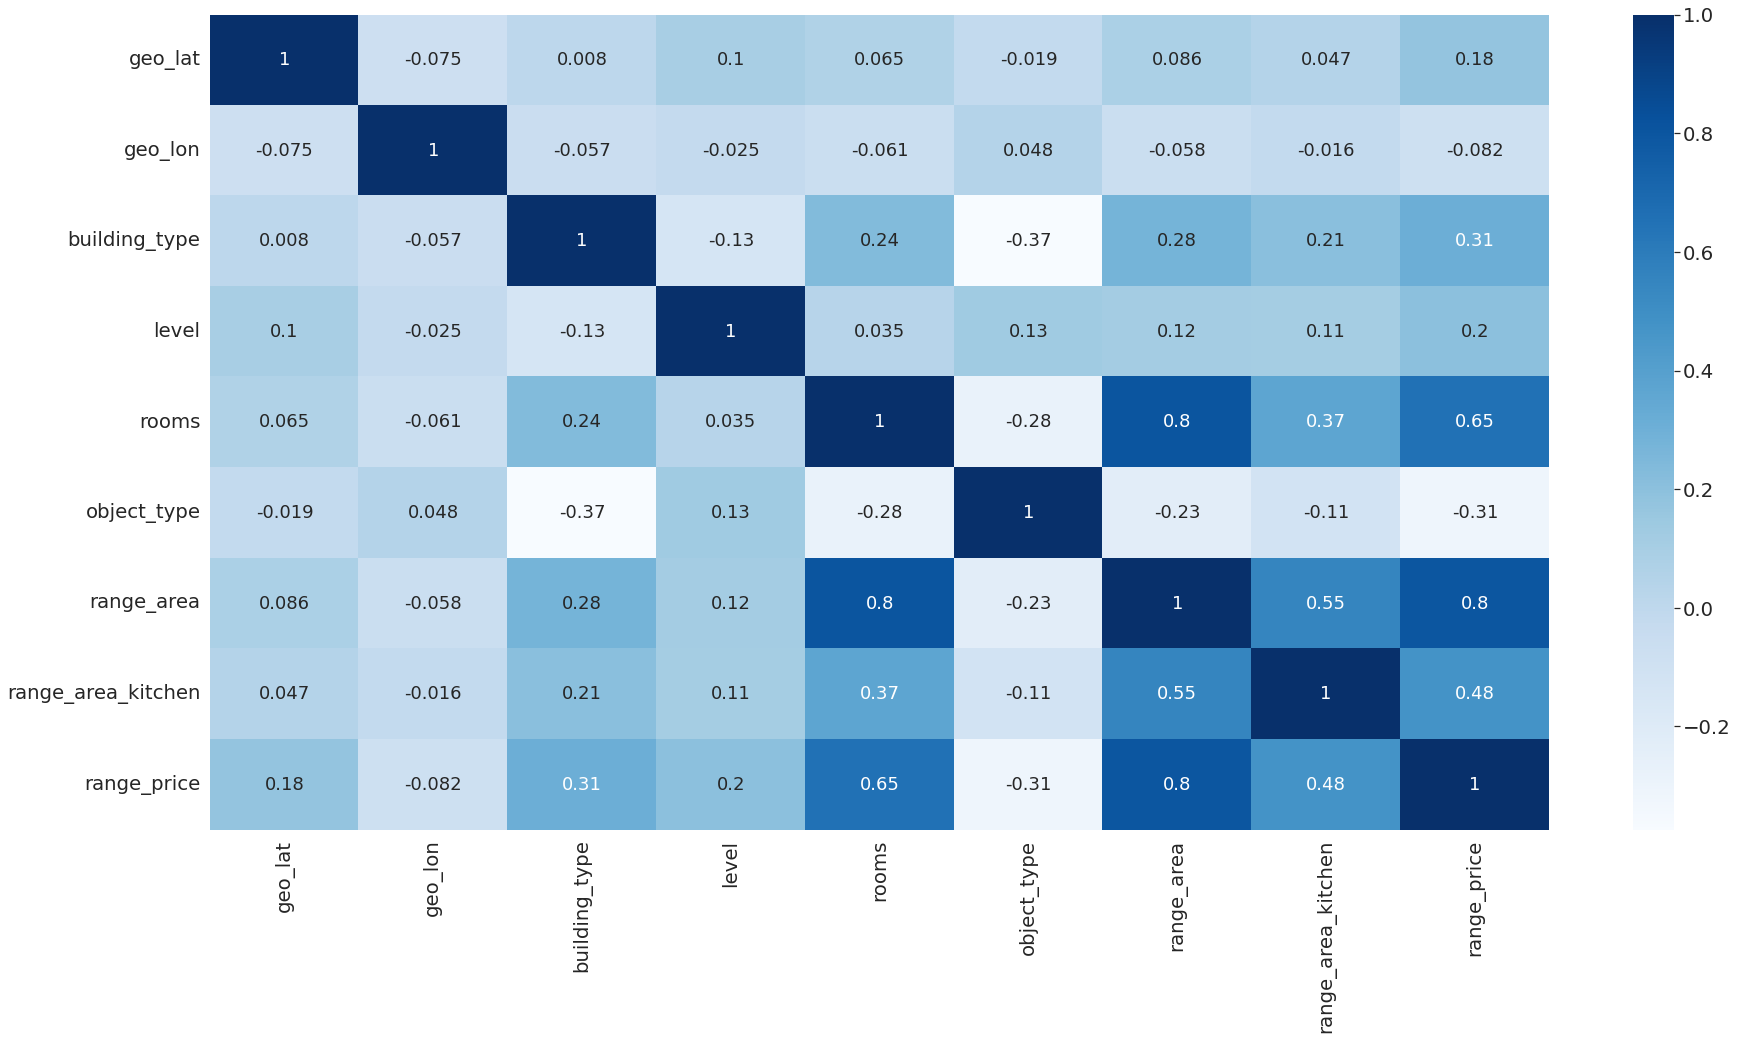

In [ ]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(30,15))
ax = sns.heatmap(d[d.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})


In [ ]:
# Drop values to avoid variables with too high correlation
'''VALUTA SE ELIMINARE LATITUDINE, LONGITUDINE, AREA, PERCHÈ LE VARIABILI SONO ABBASTANZA CORRELATE CON ALTRE FEATURES'''

x = x.drop(['rooms'], axis=1)

x_t = x_t.drop(['rooms'], axis=1)


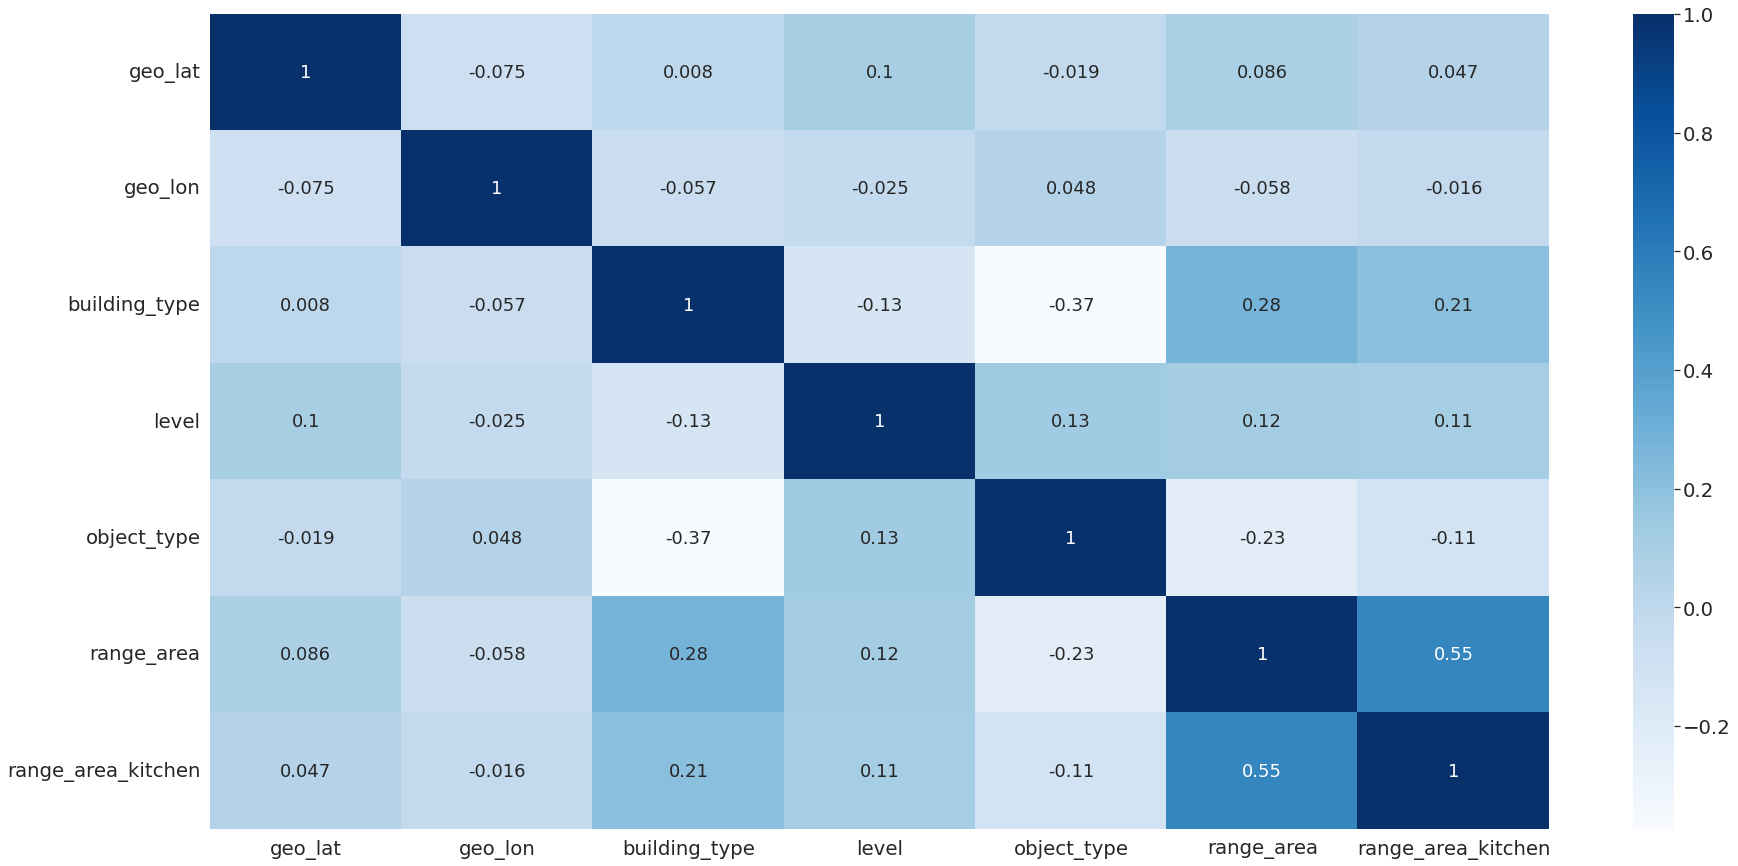

In [ ]:
# Check for correlation
#d.corr() #less representative way
plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

____
# CLASSIFICATION

In [ ]:
from sklearn.preprocessing import label_binarize
# Random state
rs = 42

'''SERVE PER IL PROBLEMA MULTICLASSE'''
y2 = label_binarize(y, classes=[0, 1, 2, 3, 4, 5])

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=rs)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y2, test_size=0.3, random_state=rs)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 7)
(18000, 7)
(42000, 1)
(18000, 1)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

#https://scikit-learn.org/stable/modules/multiclass.html

# List of classifiers:
'''prendiamo 4 classificatori'''
classifiers = [
    OneVsRestClassifier(LogisticRegression(random_state = rs, multi_class='ovr')),
    OneVsRestClassifier(GradientBoostingClassifier(random_state = rs)),
    OneVsRestClassifier(DecisionTreeClassifier(random_state=rs)),
    OneVsRestClassifier(LinearSVC(multi_class='ovr')), #NON MI FA PER IL MULTICLASSE
    OneVsRestClassifier(RandomForestClassifier(n_estimators = 10, random_state=rs)),
    OneVsRestClassifier(SGDClassifier(random_state=rs)),
    OneVsRestClassifier(Perceptron(random_state=rs)),
    OneVsRestClassifier(KNeighborsClassifier()),
    OneVsRestClassifier(AdaBoostClassifier(random_state=rs)),
    OneVsRestClassifier(ExtraTreesClassifier(random_state=rs)),
    OneVsRestClassifier(GaussianNB()),

]

# List of results that will occure:
clf_name = ["LogisticRegression", "GradientBoostingClassifier", "DecisionTreeClassifier", "LinearSVC", "RandomForestClassifier", "SGDClassifier", "Perceptron", "KNeighborsClassifiers", "AdaBoostClassifier", "ExtraTreesClassifier", "GaussianNB"] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

'''facciamo la Cross Validation con gruppi ben distribuiti'''
kfold = StratifiedKFold(n_splits=10) #cross-validation  
#kfold = StratifiedKFold(n_splits=30) #cross-validation  


cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

roc_auc2 = dict() #roc curve:
tpr = dict()
fpr = dict()

Accuracy: 0.47 	 ---> LogisticRegression 
-------------------------------------------------------------------


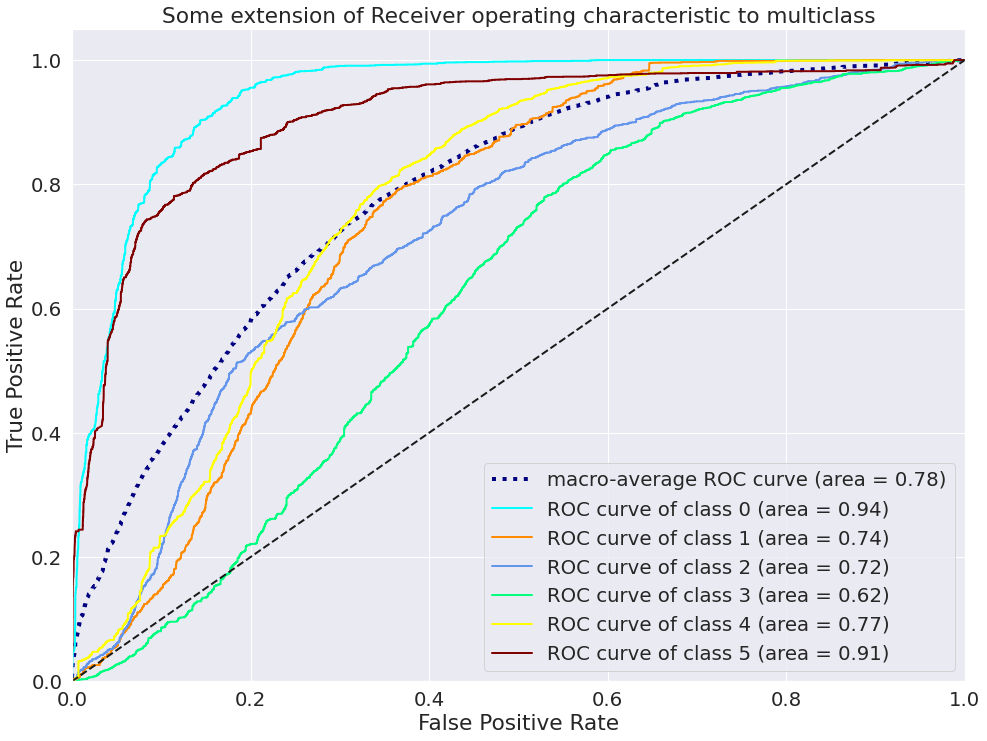

Accuracy: 0.69 	 ---> GradientBoostingClassifier 
-------------------------------------------------------------------


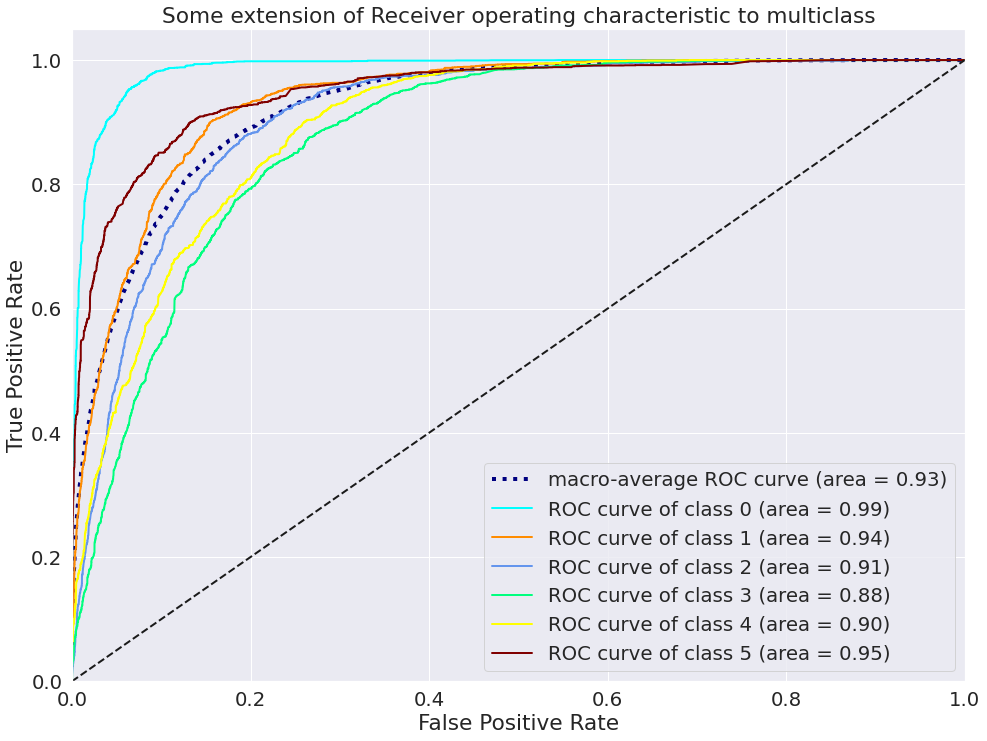

Accuracy: 0.78 	 ---> DecisionTreeClassifier 
-------------------------------------------------------------------


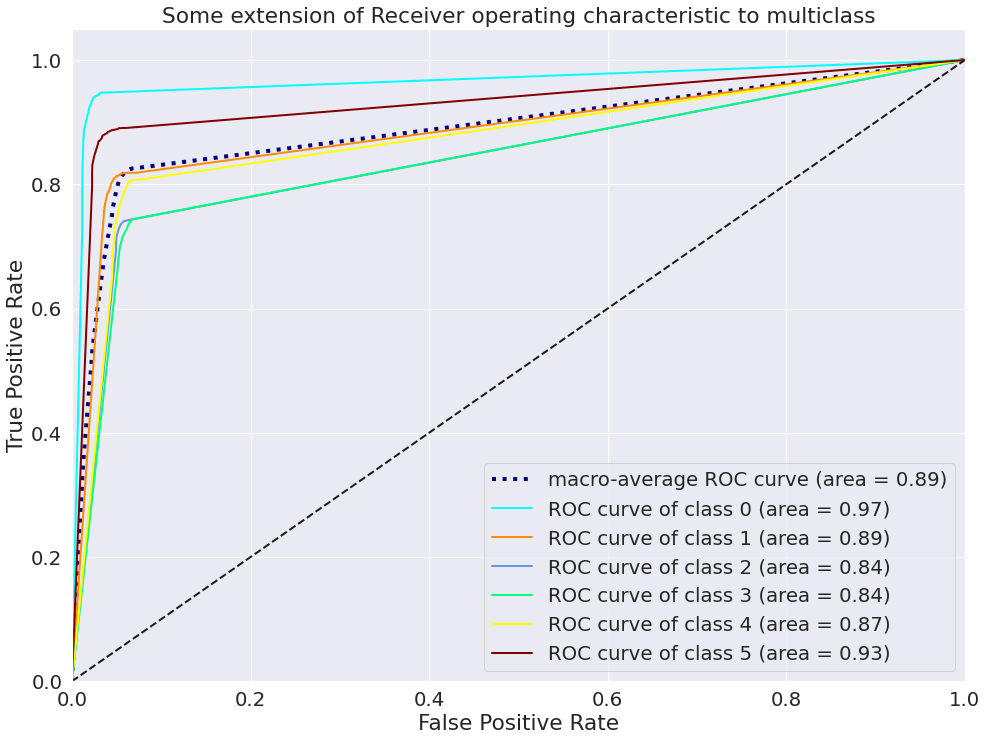

modify classifier with CalibratedClassifierCV() to detect probabilities
Accuracy: 0.46 	 ---> LinearSVC 
-------------------------------------------------------------------


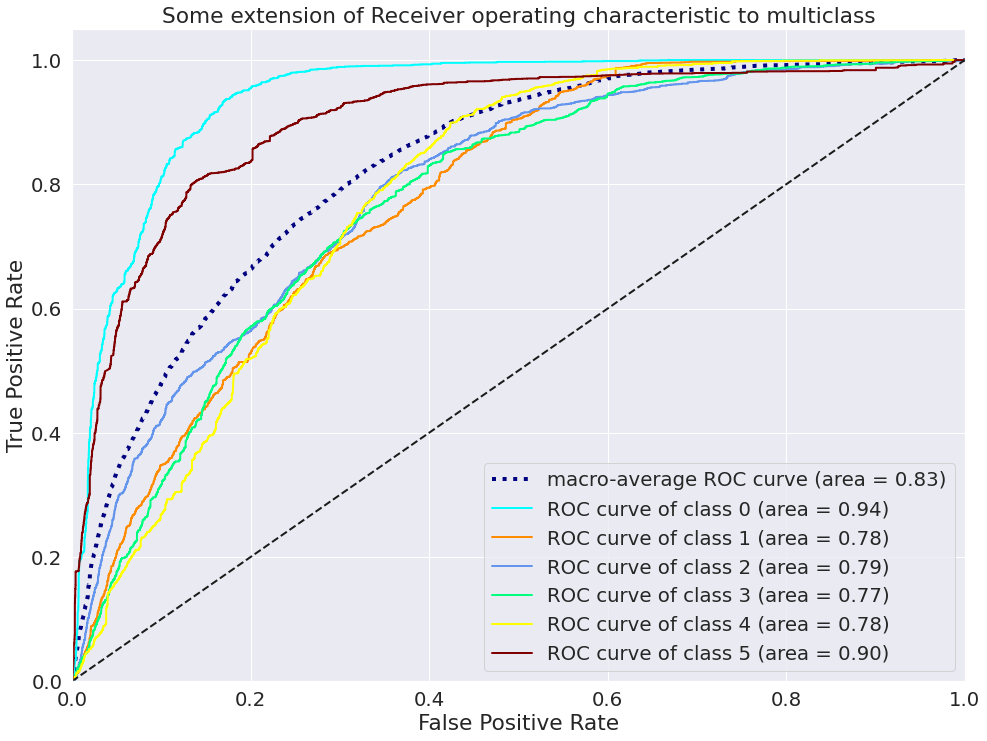

Accuracy: 0.81 	 ---> RandomForestClassifier 
-------------------------------------------------------------------


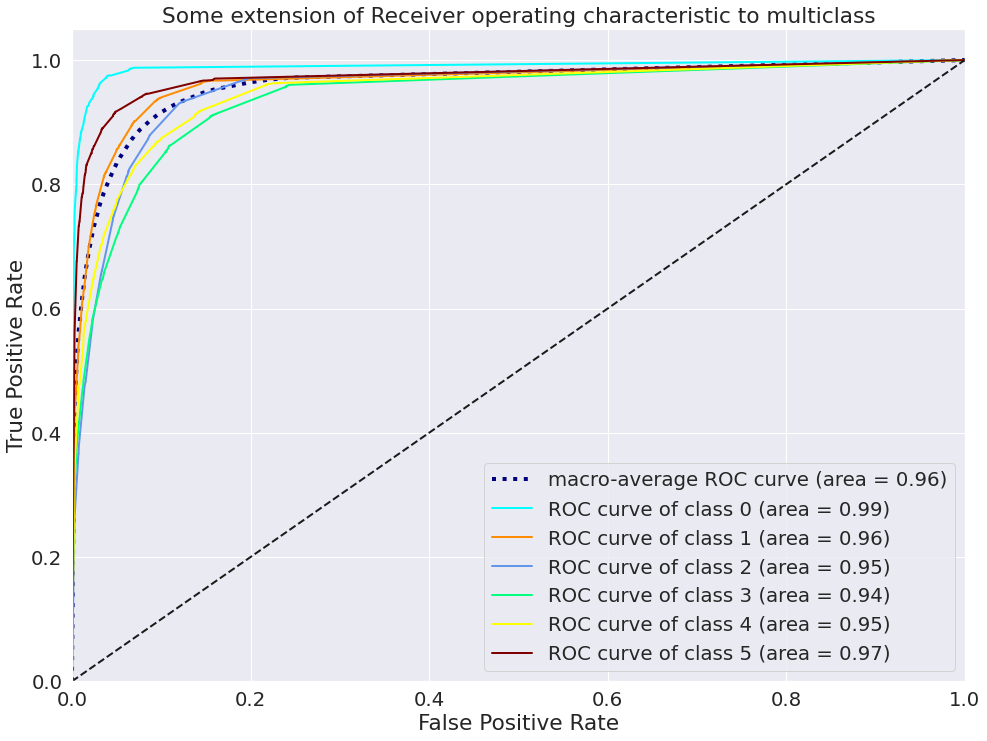

modify classifier with CalibratedClassifierCV() to detect probabilities
Accuracy: 0.47 	 ---> SGDClassifier 
-------------------------------------------------------------------


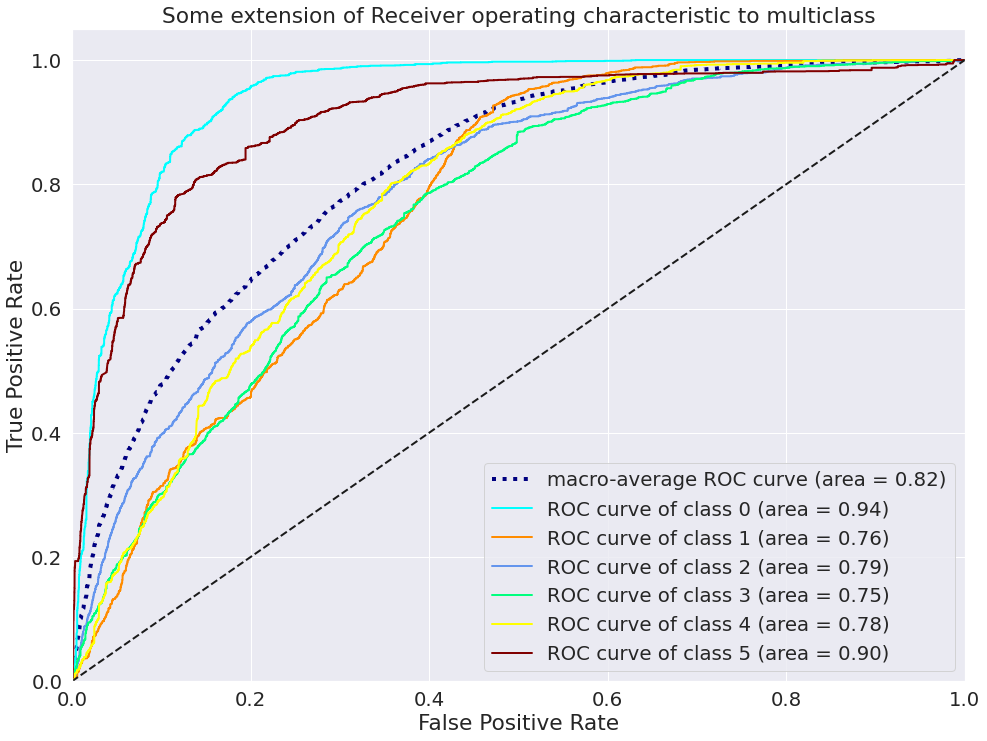

modify classifier with CalibratedClassifierCV() to detect probabilities
Accuracy: 0.47 	 ---> Perceptron 
-------------------------------------------------------------------


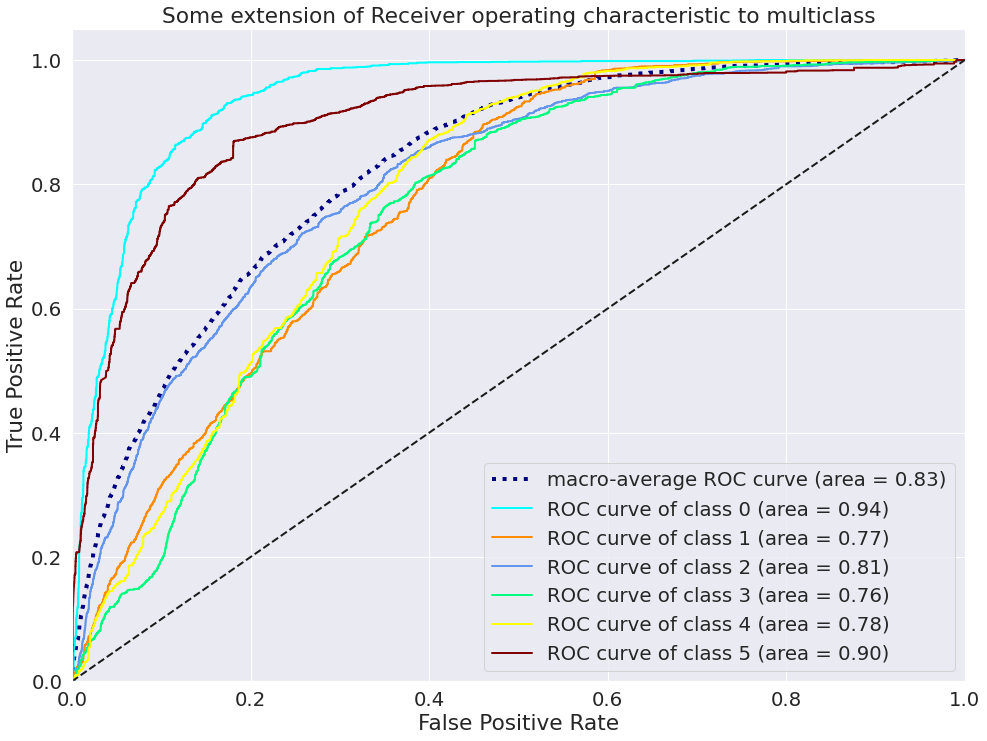

Accuracy: 0.7 	 ---> KNeighborsClassifiers 
-------------------------------------------------------------------


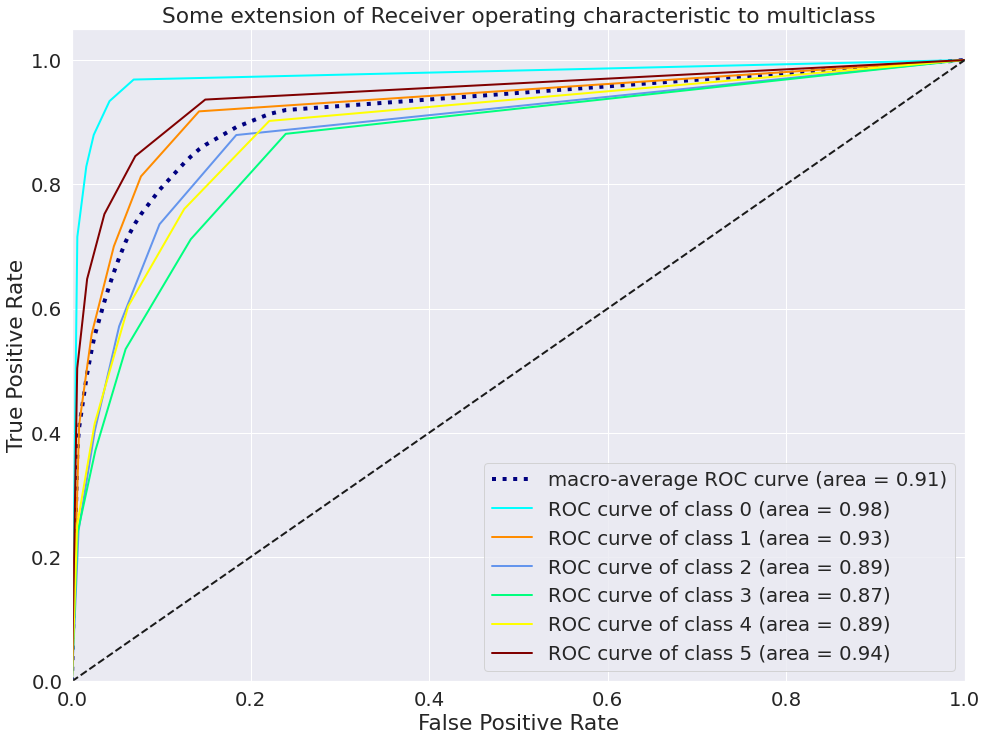

Accuracy: 0.61 	 ---> AdaBoostClassifier 
-------------------------------------------------------------------


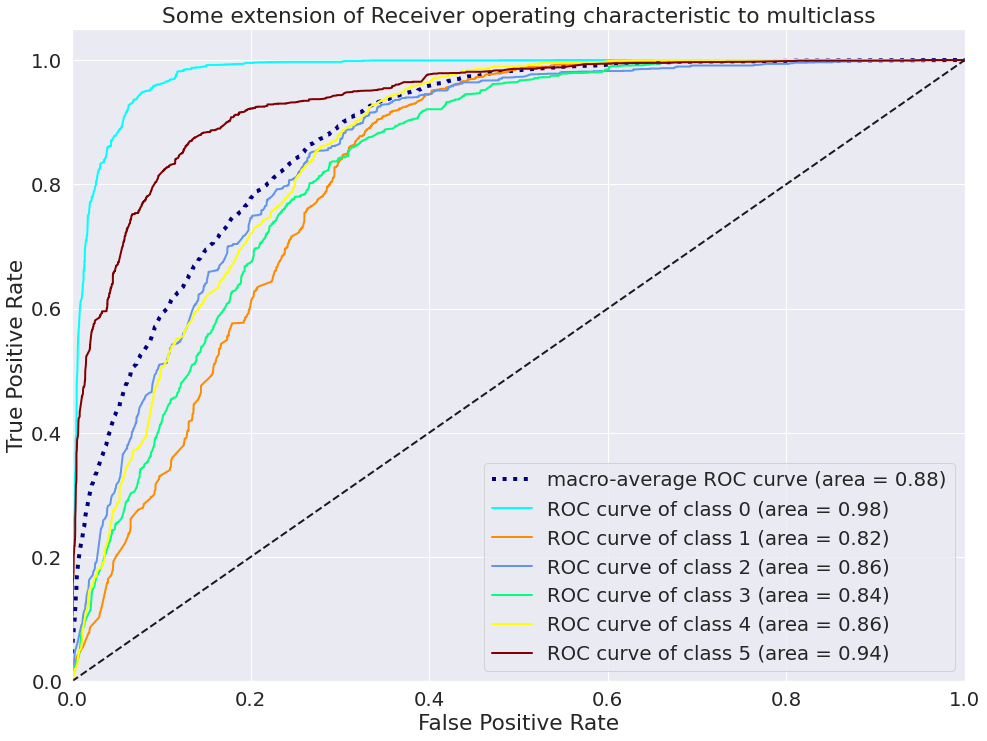

Accuracy: 0.8 	 ---> ExtraTreesClassifier 
-------------------------------------------------------------------


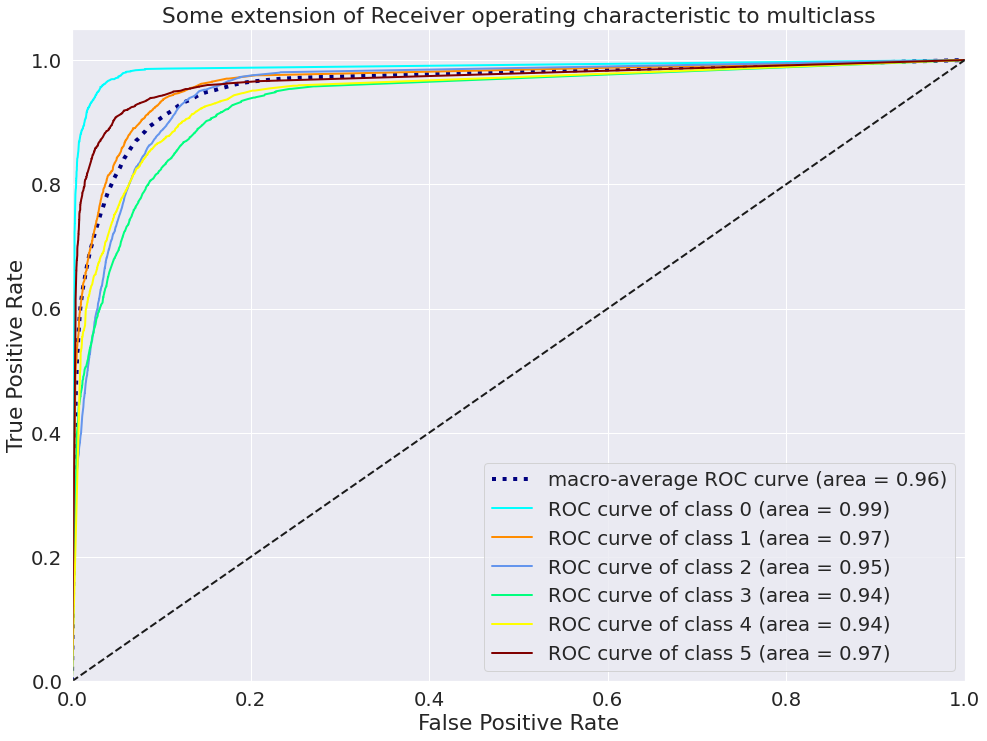

Accuracy: 0.49 	 ---> GaussianNB 
-------------------------------------------------------------------


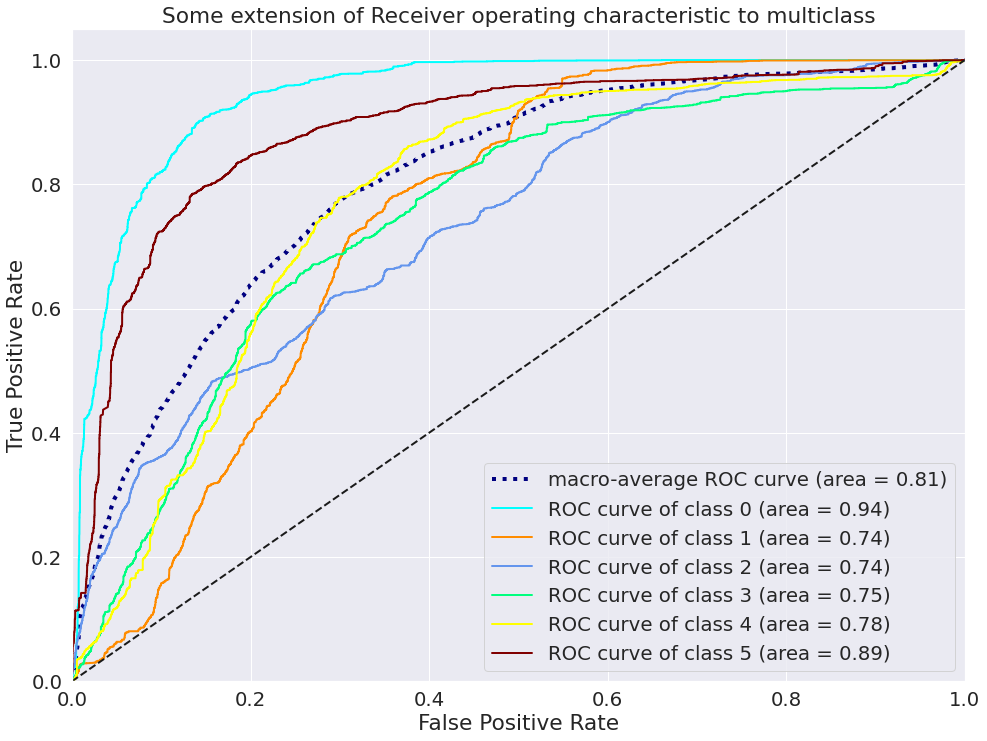

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

n_classes = 6
# Training the algorithms and results
j=0
for clf in classifiers:
    name = clf_name[j]
    #print(j)
    if j==3 or j==5 or j==6:
      print("modify classifier with CalibratedClassifierCV() to detect probabilities")
      clf = CalibratedClassifierCV(clf)
    #fitting and predictions  
    model2 = clf.fit(x_train, y_train)
    y_pred = model2.predict(x_test)
    model_results[name] = y_pred
  
 
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize

    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    print("-------------------------------------------------------------------")
    

    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))

    
    '''ROC-AUC CALCULATIONS'''
    if j==3 or j==5 or j==6:
      y_score = clf.fit(x_train2, y_train).predict_proba(x_test2)
    else:
      y_score = clf.fit(x_train2, y_train2).predict_proba(x_test2)

    #https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

    for i in range(n_classes):

      #VERIFICA CHE IL DIZIONARIO CON DOPPIO INDICE VADA BENE O MODIFICA, PRIMA C'ERA SOLO LA [i]

      fpr[i], tpr[i], _ = roc_curve(y_test2[:, i], y_score[:, i])
      roc_auc2[i] = auc(fpr[i], tpr[i])
    '''END ROC-AUC'''

    '''VADO A STAMPARE LA ROC-CURVE PER UN PROBLEMA MULTICLASSE'''
    
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc2["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    lw=2
    plt.figure(figsize=(16, 12))
    #figure(figsize=(8, 6), dpi=80)
    #plt.plot(
     #   fpr["micro"],
     #   tpr["micro"],
     #   label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
     #   color="deeppink",
     #   linestyle=":",
     #   linewidth=4,
    #)

    plt.plot(
        fpr["macro"],
        tpr["macro"],
        label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc2["macro"]),
        color="navy",
        linestyle=":",
        linewidth=4,
    )

    colors = cycle(["aqua", "darkorange", "cornflowerblue", "springgreen", "yellow", "maroon", "lightpink", "black", "moccasin", "red"])
    for i, color in zip(range(n_classes), colors):
        plt.plot(
            fpr[i],
            tpr[i],
            color=color,
            lw=lw,
            label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc2[i]),
        )

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Some extension of Receiver operating characteristic to multiclass")
    plt.legend(loc="lower right")
    plt.show()
    
    j = j+1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


In [ ]:
print(len(cv_acc))
print(len(cv_std))
print(len(clf_name))
print(cv_acc)
print(clf_name)


11
11
11
[0.46449999999999997, 0.6801428571428572, 0.7680714285714286, 0.4624761904761906, 0.8010714285714287, 0.45633333333333337, 0.46164285714285713, 0.6962142857142857, 0.6185238095238095, 0.789595238095238, 0.4898095238095238]
['LogisticRegression', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'LinearSVC', 'RandomForestClassifier', 'SGDClassifier', 'Perceptron', 'KNeighborsClassifiers', 'AdaBoostClassifier', 'ExtraTreesClassifier', 'GaussianNB']


Text(0.5, 1.0, 'Cross validation scores')

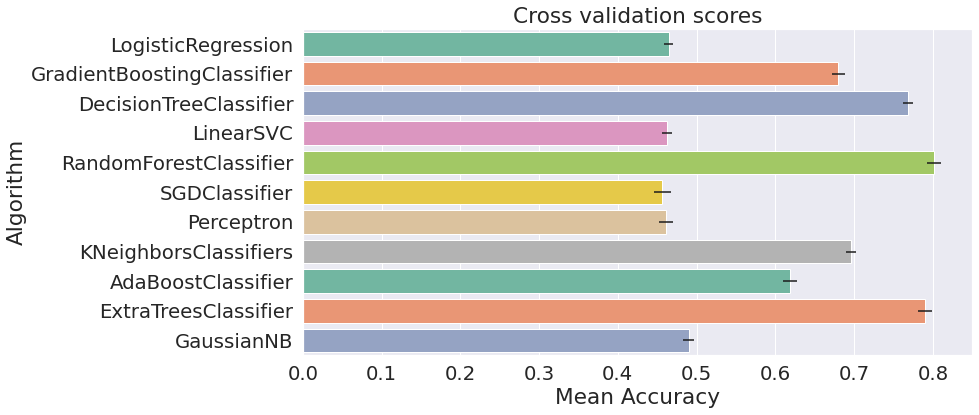

In [ ]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

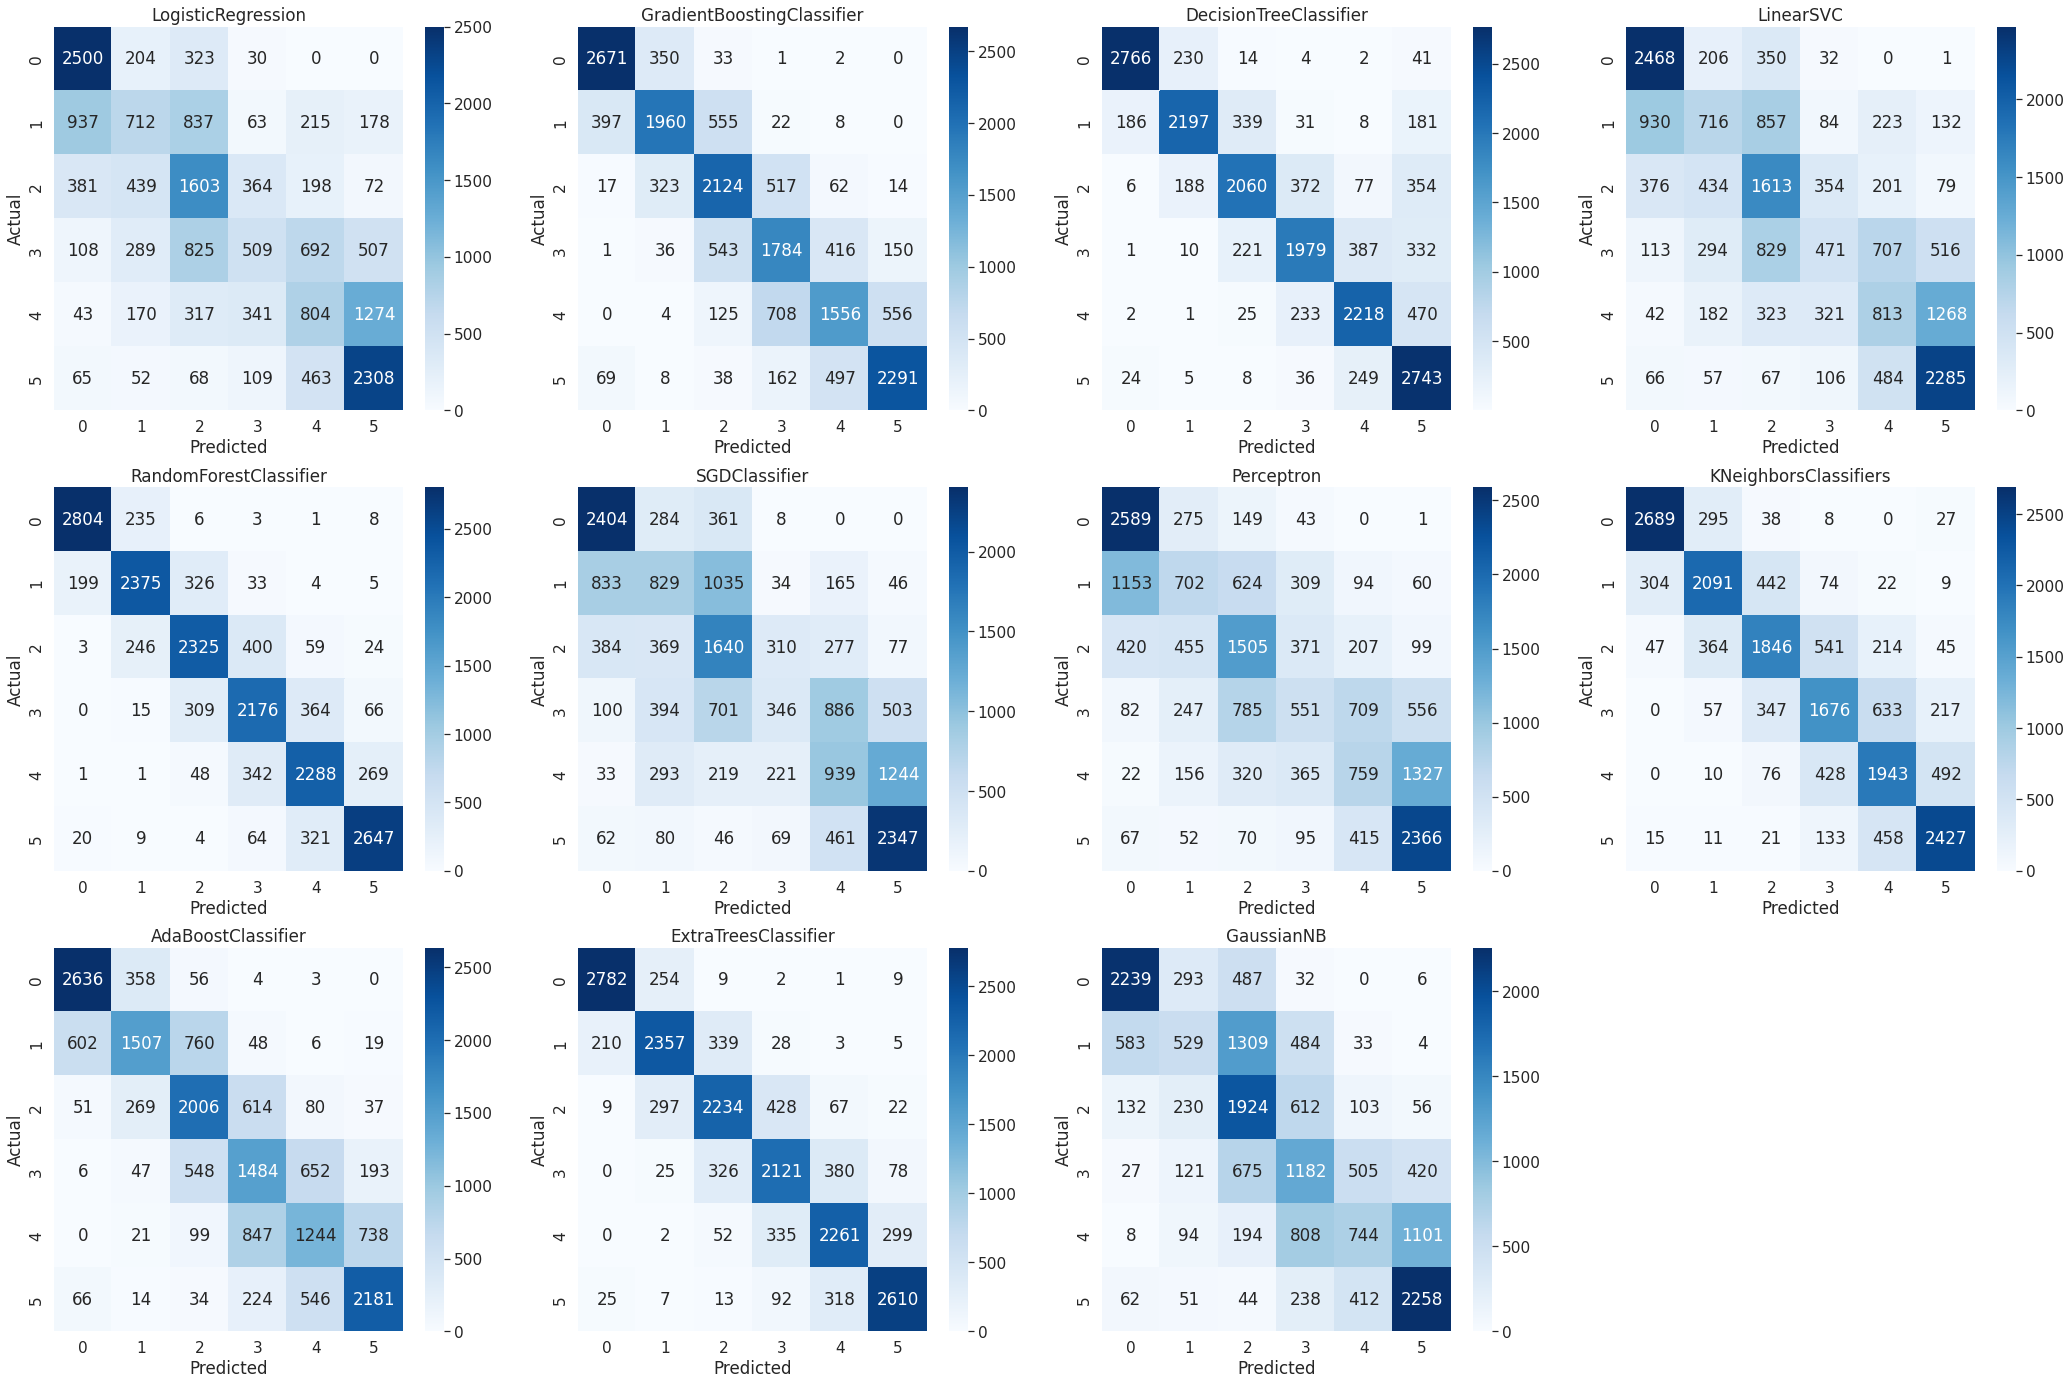

In [ ]:
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(36,24))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,4,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      3057
           1       0.38      0.24      0.30      2942
           2       0.40      0.52      0.46      3057
           3       0.36      0.17      0.23      2930
           4       0.34      0.27      0.30      2949
           5       0.53      0.75      0.62      3065

    accuracy                           0.47     18000
   macro avg       0.44      0.46      0.44     18000
weighted avg       0.44      0.47      0.44     18000

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3057
           1       0.73      0.67      0.70      2942
           2       0.62      0.69      0.66      3057
           3       0.56      0.61      0.58      2930
           4       0.61      0.53      0.57      2949
           5       0.76      0.75      0

In [ ]:
'''TESTA SUCCESSIVAMENTE QUESTA PARTE'''
'''
# ROC Curve
plt.figure(figsize=(15,8))
#print(fpr)
#print(len(tpr))
for j in range(len(classifiers))
  for i in range(len(clf_name)):
      cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
      #plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
      plt.plot(fpr[j][i], tpr[j][i], c=cm[j], lw=1, label=clf_name[j].replace("Classifier", "") + " (AUC = " + str(round(roc_auc2[j][i],2)) + ")")
      plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('ROC curve: Receiver Operating Characteristic')
      plt.legend(loc="lower right")
'''

'\n# ROC Curve\nplt.figure(figsize=(15,8))\n#print(fpr)\n#print(len(tpr))\nfor j in range(len(classifiers))\n  for i in range(len(clf_name)):\n      cm = [\'red\', \'blue\', \'orange\', \'green\', \'pink\', \'yellow\', \'lightgreen\', \'black\', \'purple\', \'lightblue\'] #add more colours for more algorithms\n      #plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")\n      plt.plot(fpr[j][i], tpr[j][i], c=cm[j], lw=1, label=clf_name[j].replace("Classifier", "") + " (AUC = " + str(round(roc_auc2[j][i],2)) + ")")\n      plt.plot([0, 1], [0, 1], color=\'navy\', lw=1, linestyle=\'--\')\n      plt.xlabel(\'False Positive Rate\')\n      plt.ylabel(\'True Positive Rate\')\n      plt.title(\'ROC curve: Receiver Operating Characteristic\')\n      plt.legend(loc="lower right")\n'

In [ ]:
# Search grid for optimal parameters
#ESEMPIO - https://www.kaggle.com/emanueleamcappella/random-forest-hyperparameters-tuning

DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["gini"]}
DTgs = GridSearchCV(DecisionTreeClassifier(), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

ET_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini", "entropy"]}


'''ET_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,150],
            "criterion": ["gini"]}  #, "entropy"'''
#using 4 n_jobs for faster processing
ETgs = GridSearchCV(ExtraTreesClassifier(), param_grid=ET_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)

RF_param = {'n_estimators': [10, 25],
            'max_features': [0.3, 0.7, 1], 
            'max_depth': [10, 50, None], 
            'bootstrap': [True, False]}
RFgs = GridSearchCV(RandomForestClassifier(), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)



models = [DTgs, ETgs, RFgs]
#models = [ETgs]

gs_model = []
score = []

for model in models:
    model.fit(x_train, y_train)
    print('Best params: %s' % model.best_params_)
    print("---------------------------------------------------------------------------------------------------")
    gs_model.append(model.best_estimator_)
    score.append(model.best_score_)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 3}
---------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Best params: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 0.7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
---------------------------------------------------------------------------------------------------
Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best params: {'bootstrap': True, 'max_depth': None, 'max_features': 0.7, 'n_estimators': 25}
---------------------------------------------------------------------------------------------------


In [ ]:
# scores without gridsearch
print("score without GridSearchCV: ", round(cv_acc[2], 3), round(cv_acc[4], 3), round(cv_acc[9], 3))
# scores with gridsearch
print("score with GridSearchCV: ", round(score[0], 3), round(score[2], 3), round(score[1], 3))

score without GridSearchCV:  0.768 0.801 0.79
score with GridSearchCV:  0.687 0.812 0.794


Text(0.5, 1.0, 'Correlation between models')

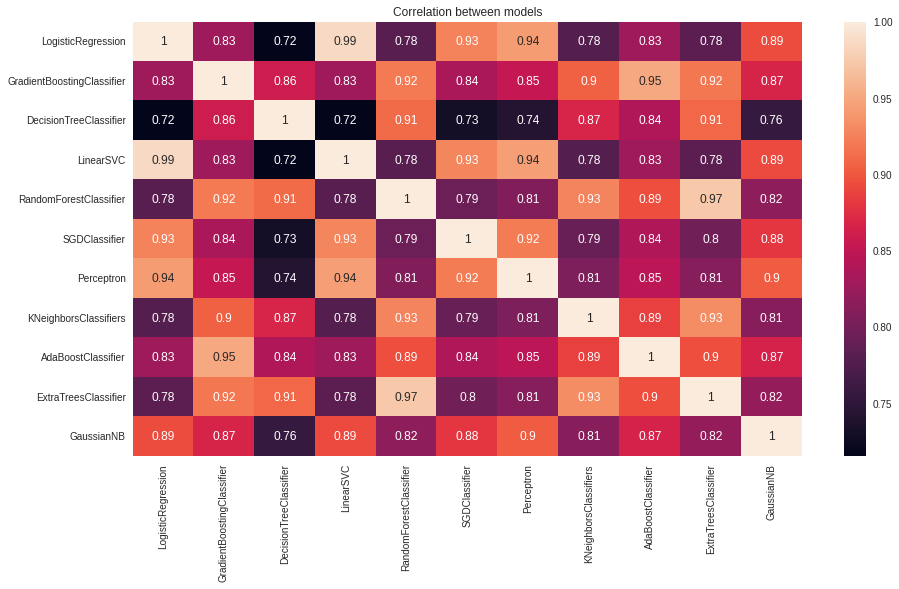

In [ ]:
# Check for correlation between models: Make a correlation graph
plt.figure(figsize=(15,8))
sns.heatmap(model_results.drop("range_price", axis=1).corr(),annot=True)
plt.title("Correlation between models")

## MODEL ENSEMBLE
- combine classifiers to predict
### VOTING TYPE:
- HARD: uses predicted class labels for majority rule voting
- SOFT: predicts the class label based on the argmax of the sums of the predicted probabilities

In [ ]:
# Do model ensembling
best_model = VotingClassifier(estimators=[('et', gs_model[1]), ('rf', gs_model[2]) ], 
                              voting='soft', n_jobs=4)
best_model.fit(x_train,y_train)
print("accuracy")
print(accuracy_score(y_test,best_model.predict(x_test)))


0.8151111111111111


## TEST THE MODEL

Accuracy: 0.42
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.07      0.13      5000
           1       0.32      0.43      0.37      5000
           2       0.32      0.54      0.40      5000
           3       0.40      0.37      0.38      5000
           4       0.46      0.46      0.46      5000
           5       0.67      0.62      0.64      5000

    accuracy                           0.42     30000
   macro avg       0.47      0.42      0.40     30000
weighted avg       0.47      0.42      0.40     30000



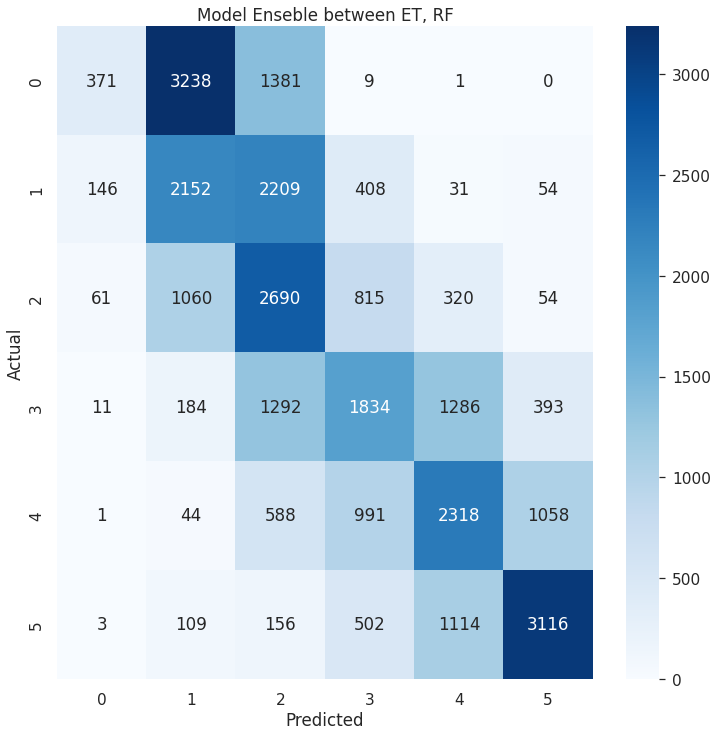

In [ ]:
'''TEST SET APPLICATO AL MODELLO BEST PER OSSERVARE I RISULTATI'''
#train the model on the whole dataset and produce results:
range_price_pred = pd.Series(best_model.predict(x_t), name='range_price')
y_pred_best = best_model.predict(x_t)

acc = round(accuracy_score(y_t, y_pred_best), 2) #need to maximize
print(f'Accuracy: {acc}')

#Confusion Matrix
CM_best = confusion_matrix(y_t, y_pred_best)

plt.figure(figsize=(12,12))
sns.set(font_scale=1.4)
sns.heatmap(CM_best, annot=True, fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Model Enseble between ET, RF")

#Classification report
CLR_best = classification_report(y_t, y_pred_best)

print (f"Classification Report:" );
print (CLR_best);

In [ ]:
range_price_pred.value_counts()

2    8316
1    6787
4    5070
5    4675
3    4559
0     593
Name: range_price, dtype: int64

## YELLOWBRICK

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.classifier import ROCAUC
from yellowbrick.model_selection import LearningCurve

In [ ]:
'''ROC AUC BINARY PROBLEM'''
'''
# Instantiate the visualizer with the classification model
plt.figure(figsize=(12,8))
visualizer = ROCAUC(best_model, classes=["0", "1", "2", "3", "4"], micro=False, macro=False, binary=True)
visualizer.fit(x_train, y_train)        # Fit the training data to the visualizer
visualizer.score(x_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure
'''

'\n# Instantiate the visualizer with the classification model\nplt.figure(figsize=(12,8))\nvisualizer = ROCAUC(best_model, classes=["0", "1", "2", "3", "4"], micro=False, macro=False, binary=True)\nvisualizer.fit(x_train, y_train)        # Fit the training data to the visualizer\nvisualizer.score(x_test, y_test)        # Evaluate the model on the test data\nvisualizer.show()                       # Finalize and show the figure\n'

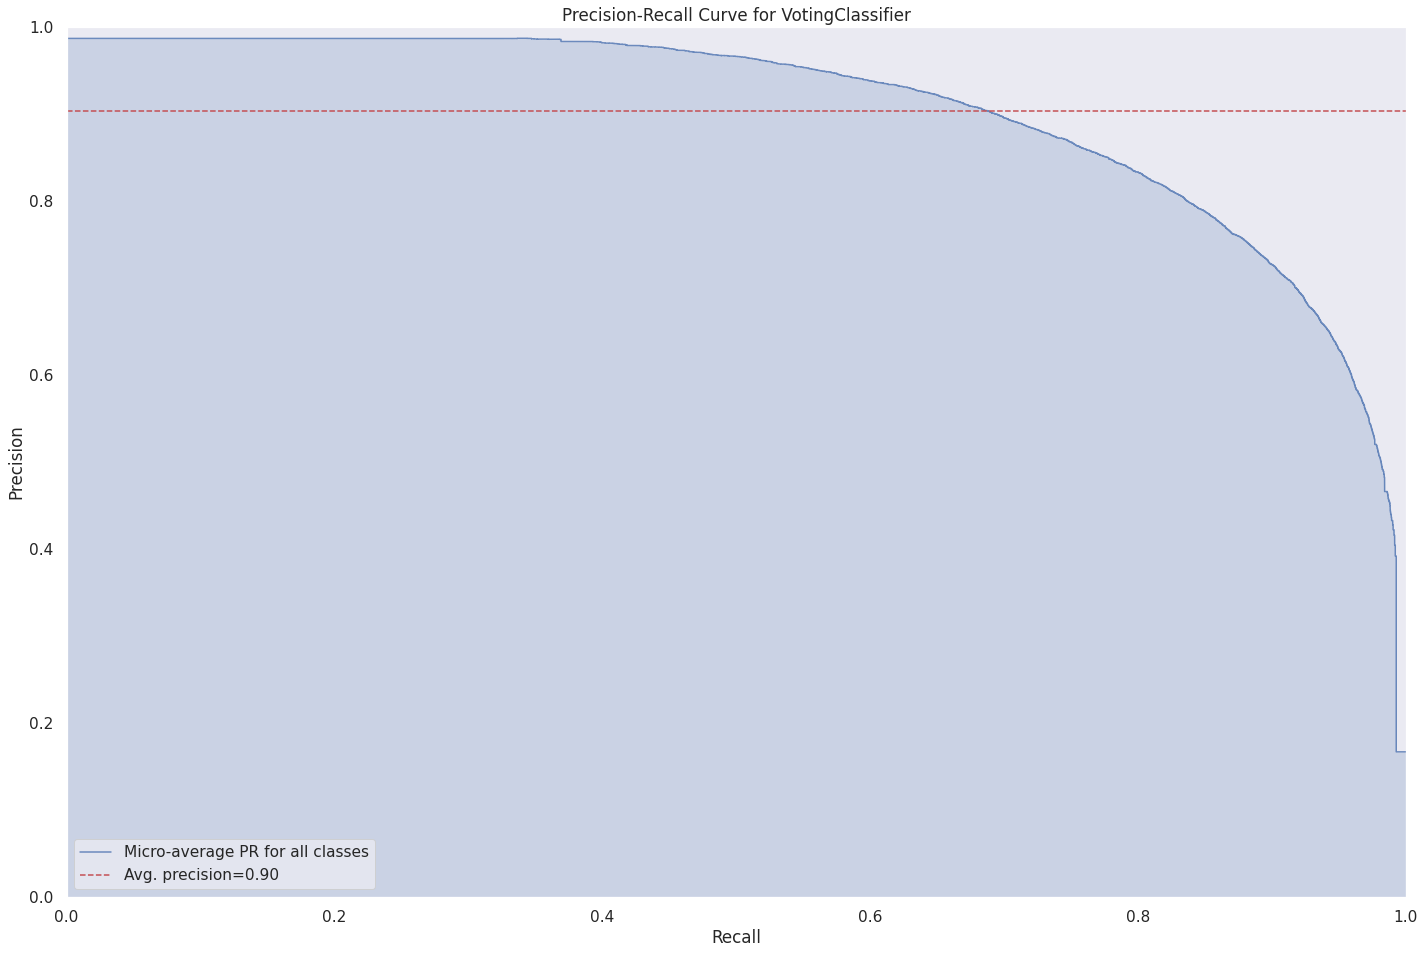

In [ ]:
plt.figure(figsize=(24,16))
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

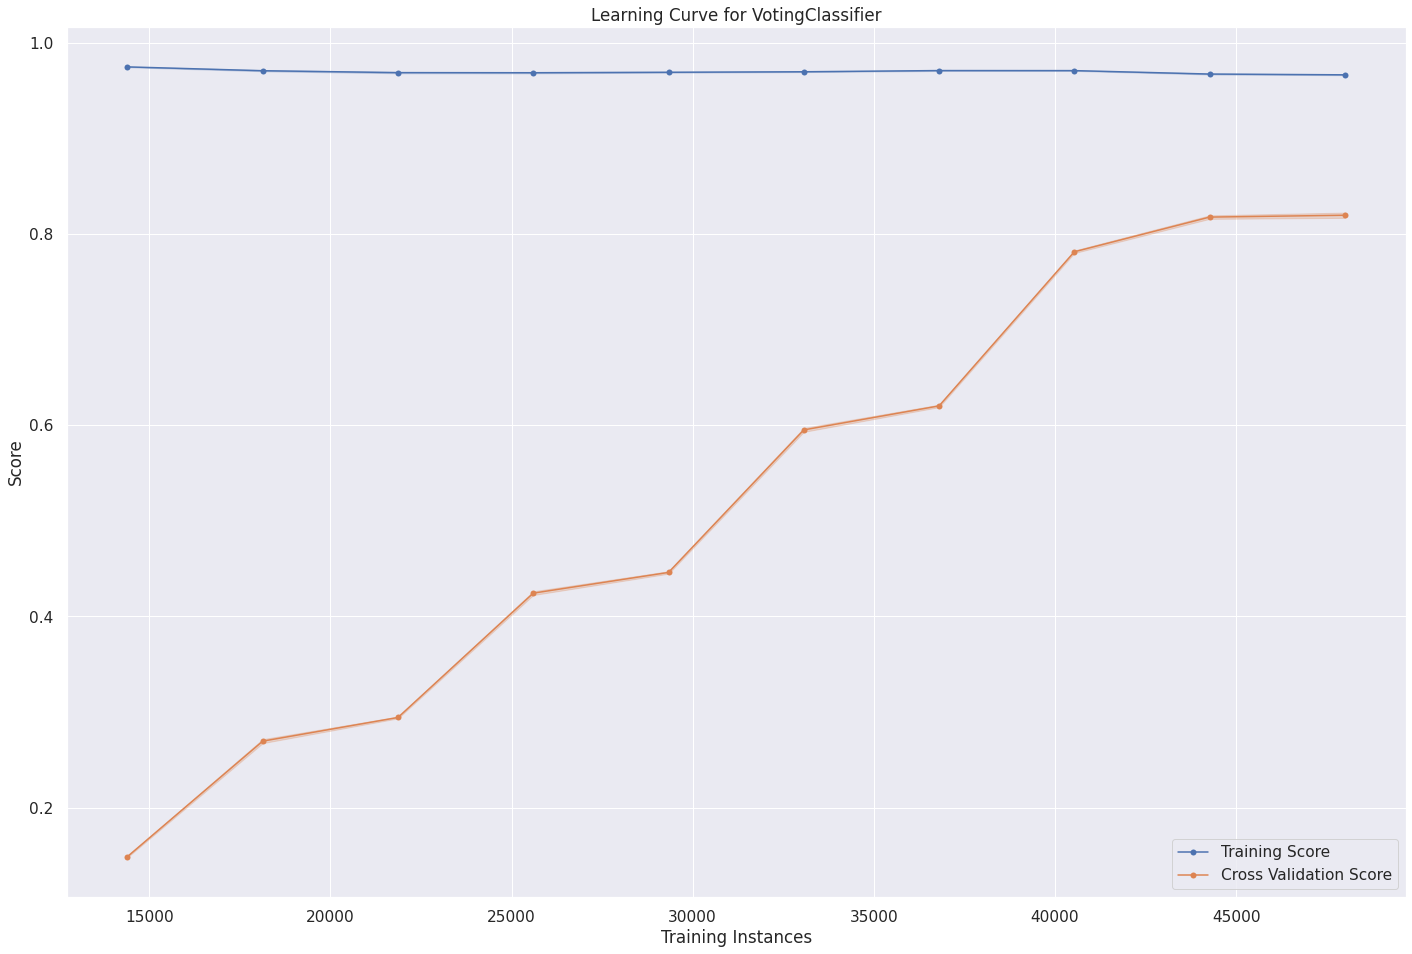

In [ ]:
# Create the learning curve visualizer
cv = StratifiedKFold(n_splits=5)
sizes = np.linspace(0.3, 1.0, 10)

plt.figure(figsize=(24,16))
visualizer = LearningCurve(
    best_model, cv=cv, scoring='f1_weighted', train_sizes=sizes, n_jobs=2
)

visualizer.fit(x, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure